In [17]:
# import packages
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as sp
%load_ext google.cloud.bigquery
import pickle
from matplotlib import pyplot as plt
from datetime import datetime
with open('design.pkl','rb') as f:
    set_params = pickle.load(f)
plt.rcParams.update(set_params)

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [25]:
df = pd.read_csv('van_ZEV_compliance_tracker.csv', index_col=0)

In [26]:
df['Allowance Surplus (after CO2 transfers)'].sum()

-306.9700000000007

In [3]:
# fig, ax = plt.subplots()

# dfa.plot(x='make', y=[
#     'ZEV Surplus', 
#     'ZEV Surplus after CO2', 
#     # 'ZEV Surplus after CO2 - Proposed'
# ], kind='barh', ax=ax, figsize=(10, 10))
# ax.set_xlabel('ZEV Credit Surplus/Shortfall')
# ax.set_ylabel('')

# ax.set_title('ZEV Mandate: Sales vs Year 1 Target as of {}'.format(last_month))

# plt.savefig('plots/top_20_last_12_months_{}.png'.format(this_month), transparent=False, bbox_inches='tight', dpi=300, facecolor='white')
# plt.show()

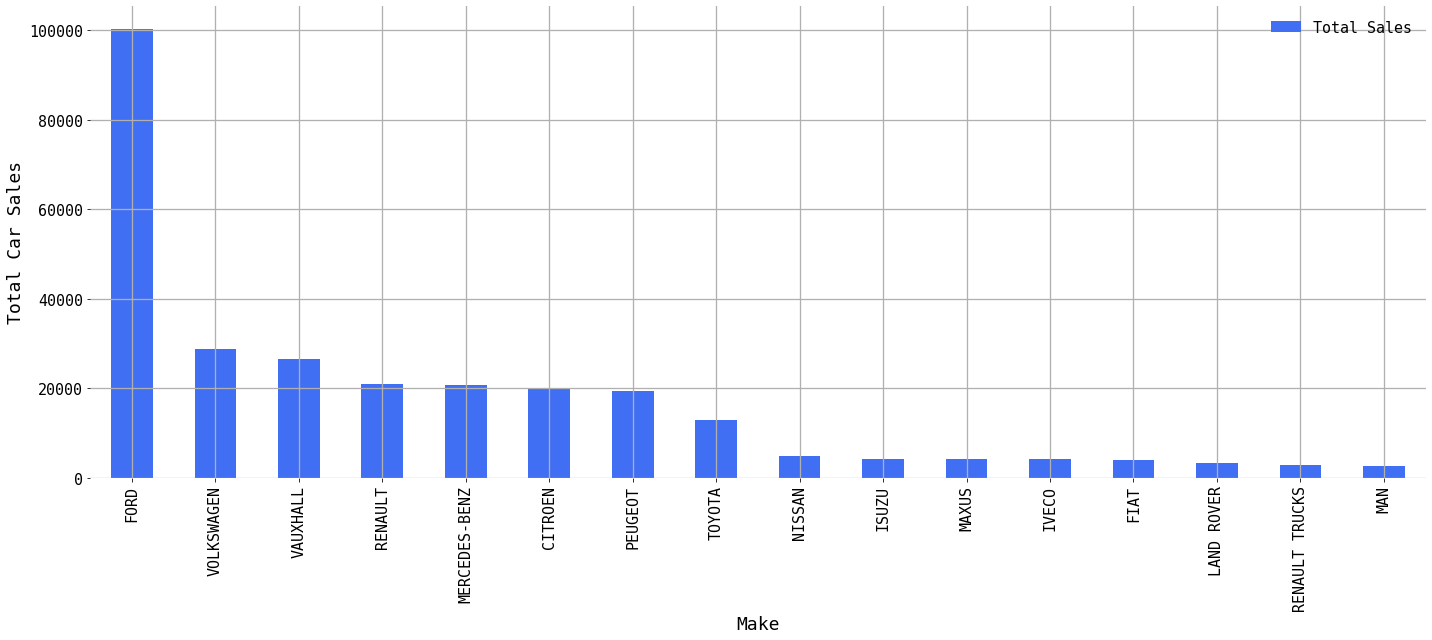

In [4]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y='Total Sales', kind='bar', ax=ax)

ax.set_ylabel('Total Car Sales')

plt.savefig('plots/how_s1_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')


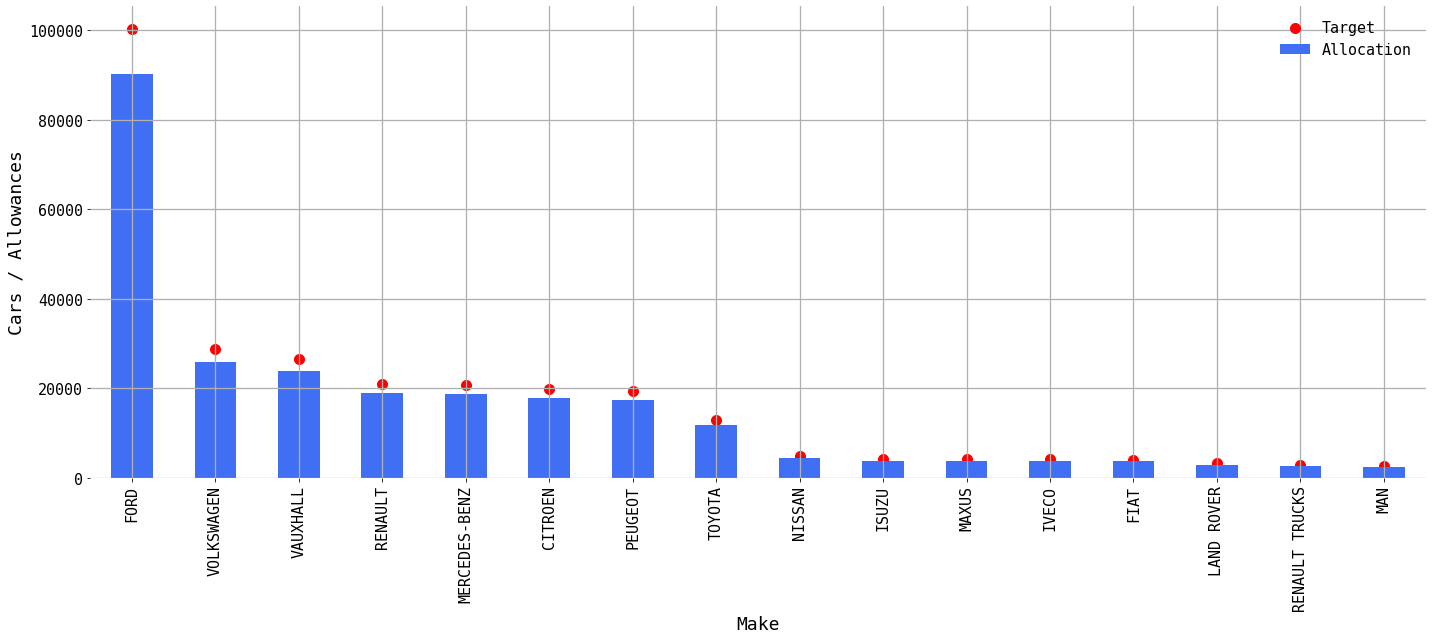

In [5]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y='Allocated allowances', kind='bar', ax=ax, label='Allocated Allowances')
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s2_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

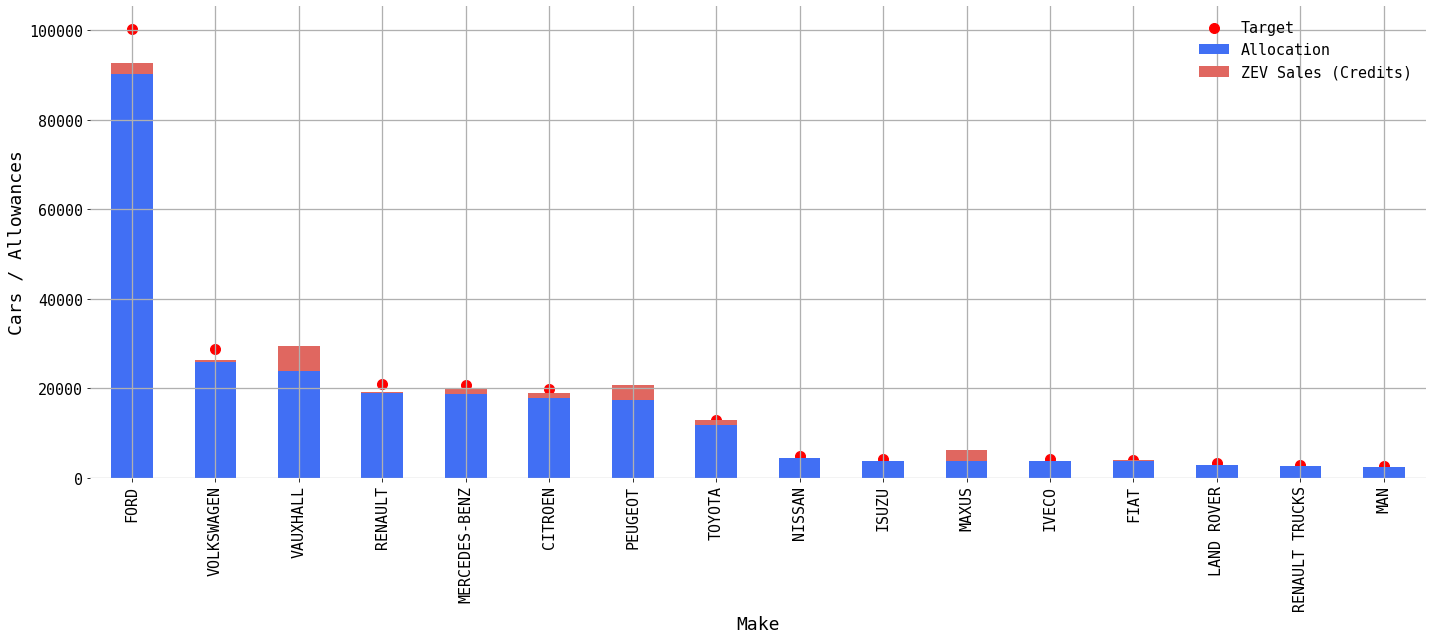

In [6]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y=['Allocated allowances', 'ZEV Sales'], kind='bar', ax=ax, label=['Allocated Allowances', 'ZEV Sales'], stacked=True)
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation', 'ZEV Sales (Credits)'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s3_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

In [7]:
df['ZEV Credits available from CO2'] = df['Allowance Surplus (after CO2 transfers)'] - df['Allowance Surplus']
df

,Make,Total Sales,Non-ZEV Sales,ZEV Sales,CO2 Target,CO2 Performance,Allocated allowances,Allowance Surplus,Allowance Surplus (after CO2 transfers),ZEV Credits available from CO2
15,FORD,100326,97397,2497,203.28,213.37,90293.4,-7103.6,-7103.60,0.00
14,VOLKSWAGEN,28749,28286,463,201.45,195.10,25874.1,-2411.9,-1693.17,718.73
13,VAUXHALL,26565,20935,5622,190.11,190.81,23908.5,2973.5,2973.50,0.00
12,RENAULT,21008,19501,207,215.64,208.83,18907.2,-593.8,-68.60,525.20
11,MERCEDES-BENZ,20746,17428,1426,342.80,262.06,18671.4,1243.4,1762.05,518.65
10,CITROEN,19769,18597,1131,180.89,191.08,17792.1,-804.9,-804.90,0.00
9,PEUGEOT,19391,16196,3180,183.07,189.79,17451.9,1255.9,1255.90,0.00
8,TOYOTA,13006,11860,1144,220.21,209.58,11705.4,-154.6,170.55,325.15
7,NISSAN,4845,4399,52,230.81,222.74,4360.5,-38.5,82.62,121.12
6,ISUZU,4265,4260,0,268.66,227.63,3838.5,-421.5,-314.88,106.62


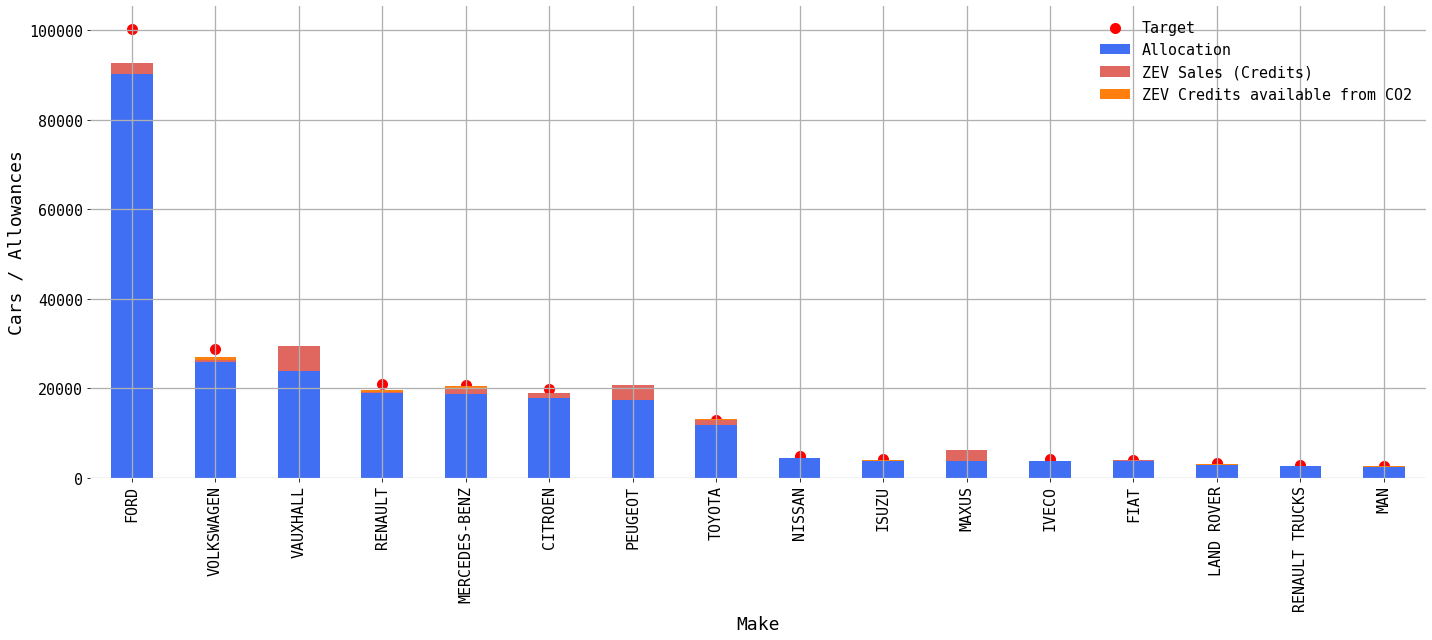

In [8]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y=['Allocated allowances', 'ZEV Sales', 'ZEV Credits available from CO2'], kind='bar', ax=ax, label=['Allocated Allowances', 'ZEV Sales', 'ZEV Credits available from CO2'], stacked=True)
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation', 'ZEV Sales (Credits)', 'ZEV Credits available from CO2'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s4_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

## Trading

In [9]:
allowances_for_sale = df[df['Allowance Surplus (after CO2 transfers)']>0]['Allowance Surplus (after CO2 transfers)'].sum()
allowances_needed = df[df['Allowance Surplus (after CO2 transfers)']<0]['Allowance Surplus (after CO2 transfers)'].sum()

In [10]:
market_deficit_percentage = allowances_for_sale / (-1*allowances_needed)

In [11]:
df['Credit Sales'] = df['Allowance Surplus (after CO2 transfers)'].apply(lambda x: (-1*x) if x>0 else 0)

df['Credit Purchases'] = df['Allowance Surplus (after CO2 transfers)'].apply(lambda x: market_deficit_percentage * (-1*x) if x<0 else 0)
df['Credits Used for Compliance'] = df.apply(lambda row: row['ZEV Sales'] if row['Allowance Surplus (after CO2 transfers)'] < 0 else row['Total Sales'] - row['Allocated allowances'], axis=1)

In [12]:
df['Credit Sales'].sum()

-10083.34

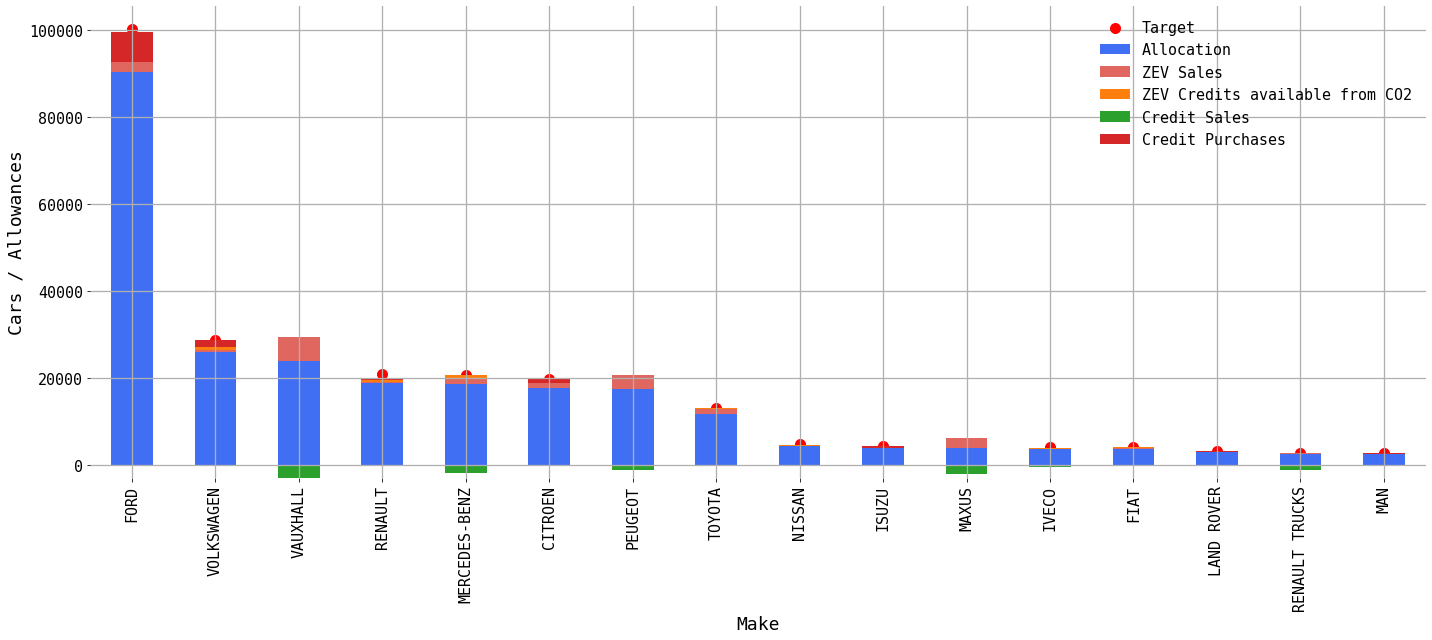

In [13]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(
    x='Make', 
    y=['Allocated allowances', 'ZEV Sales', 'ZEV Credits available from CO2', 'Credit Sales', 'Credit Purchases'], 
    kind='bar', 
    ax=ax, 
    label=['Allocated Allowances', 'ZEV Sales', 'ZEV Credits available from CO2', 'Credit Sales', 'Credit Purchases'], stacked=True)
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation', 'ZEV Sales', 'ZEV Credits available from CO2', 'Credit Sales', 'Credit Purchases'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s5_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

In [14]:
df['Allowance Surplus after Trading'] = df.apply(lambda row: row['Credit Purchases'] + row['Allowance Surplus (after CO2 transfers)'] + row['Credit Sales'], axis=1)

In [15]:
df['Borrowable'] = df.apply(lambda row: row['Total Sales'] *.16, axis=1)

In [16]:
df.sort_values('Allowance Surplus after Trading')

,Make,Total Sales,Non-ZEV Sales,ZEV Sales,CO2 Target,CO2 Performance,Allocated allowances,Allowance Surplus,Allowance Surplus (after CO2 transfers),ZEV Credits available from CO2,Credit Sales,Credit Purchases,Credits Used for Compliance,Allowance Surplus after Trading,Borrowable
15,FORD,100326,97397,2497,203.28,213.37,90293.4,-7103.6,-7103.60,0.00,0.00,6893.732143,2497.0,-209.867857,16052.16
14,VOLKSWAGEN,28749,28286,463,201.45,195.10,25874.1,-2411.9,-1693.17,718.73,0.00,1643.147200,463.0,-50.022800,4599.84
10,CITROEN,19769,18597,1131,180.89,191.08,17792.1,-804.9,-804.90,0.00,0.00,781.120137,1131.0,-23.779863,3163.04
6,ISUZU,4265,4260,0,268.66,227.63,3838.5,-421.5,-314.88,106.62,0.00,305.577225,0.0,-9.302775,682.40
2,LAND ROVER,3233,3233,0,243.05,229.76,2909.7,-323.3,-242.47,80.83,0.00,235.306497,0.0,-7.163503,517.28
0,MAN,2695,2622,69,543.09,242.30,2425.5,-196.5,-129.12,67.38,0.00,125.305295,69.0,-3.814705,431.20
12,RENAULT,21008,19501,207,215.64,208.83,18907.2,-593.8,-68.60,525.20,0.00,66.573290,207.0,-2.026710,3361.28
3,FIAT,4061,3790,271,213.25,191.91,3654.9,-135.1,-33.57,101.53,0.00,32.578212,271.0,-0.991788,649.76
13,VAUXHALL,26565,20935,5622,190.11,190.81,23908.5,2973.5,2973.50,0.00,-2973.50,0.000000,2656.5,0.000000,4250.40
11,MERCEDES-BENZ,20746,17428,1426,342.80,262.06,18671.4,1243.4,1762.05,518.65,-1762.05,0.000000,2074.6,0.000000,3319.36
